## 10218099_Nawaf Alfarizki_PR02

Sebuah partikel bermuatan $q$ bergerak dengan kecepatan 
<a name='eqn1'></a>
\begin{equation}\tag{1}
\vec{v}(t)=v_x(t)\hat{i} + v_y(t)\hat{j}
\end{equation}

dalam ruang bermedan magnetik konstan 
<a name='eqn2'></a>
\begin{equation}\tag{2}
\vec{B} = -\hat{k}B_z
\end{equation} 

Tentukan gerak partikel!

## a. Tuliskan hukum newtonnya !

## Jawab : 

Hukum Newton I menyatakan bahwa benda yang semula diam akan tetap diam dan yang semula bergerak dengan kecepatan tetap akan tetap bergerak dengan kecepatan tetap bila tidak ada gaya yang bekerja pada benda atau jumlah gaya-gaya yang bekerja sama dengan nol


\begin{equation}\label{eqn:newtons-law-1}\tag{3}
\sum F = 0
\end{equation}

Bila ada gaya yang bekerj pada benda bermassa $m$ atau jumlah gaya-gaya tidak nol. maka keadaan gerak benda akan berubah melalui percepatan $a$, dengan $m > 0$ dan $a \ne 0$.

\begin{equation}\tag{4}
    \begin{aligned}
        \sum{\vec{F}}=m\vec{a}\\
        q\vec{v}\times\vec{B}=m\vec{a}
    \end{aligned}
\end{equation}

## b. Tuliskan persamaan differensial terkopel antara kecepatan pada kedua arah!

## Jawab : 
$a_x = ...?$ ; $a_y = ...?$

\begin{equation}\tag{5}
    \begin{aligned}
        q \left[ (v_x\hat{i} + v_y\hat{j})\times(-B_z\hat{k}) \right] &= m (a_x\hat{i} + a_y\hat{j})\\
        q \left[ v_xB_z\hat{j} + (-v_yB_z\hat{i}) \right] &= m (a_x\hat{i} + a_y\hat{j})
    \end{aligned}
\end{equation}

Maka diperoleh persamaan differensial terkopel pada arah horizontal sebagai berikut,

\begin{equation}\tag{6}
    \begin{aligned}
        a_x &= \frac{-qB_zv_y}{m}\\
        \frac{\partial{v_x}}{\partial{t}} &= \frac{-qB_zv_y}{m} 
    \end{aligned}
\end{equation}

dan persamaan differensial terkopel pada arah vertikal sebagai berikut,

\begin{equation}\tag{7}
    \begin{aligned}
        a_y &= \frac{qB_zv_x}{m}\\
        \frac{\partial{v_y}}{\partial{t}} &= \frac{qB_zv_x}{m}
    \end{aligned}
\end{equation}

## c.  Selesaikan kedua persamaan differensial sehingga diperoleh $v_x(t)$, $v_y(t)$, $x(t)$, dan $y(t)$. Lakukan secara teori!

Jawab : 

Berdasarkan persamaan differensial terkopel yang telah diperoleh pada persamaan (6) dan (7)
    
\begin{equation}
    \begin{aligned}
        \frac{\partial{v_x}}{\partial{t}} &= -\left( \frac{qB_z}{m} \right)v_y\\
        \frac{\partial{v_y}}{\partial{t}} &= \left( \frac{qB_z}{m} \right)v_x
    \end{aligned}
\end{equation}

Asumsikan $\left( \frac{qB_z}{m} \right) = p$

Tinjau Persamaan
    
\begin{equation}\tag{8}
    \frac{\partial{v_x}}{\partial{t}} = -pv_y
\end{equation}

Maka

\begin{equation}\tag{9}
    \begin{aligned}
        \frac{\partial^2{v_x}}{\partial{t^2}} &= -p\frac{\partial{v_y}}{\partial{t}}\\
        \frac{\partial^2{v_x}}{\partial{t^2}} &= -p pv_x\\
                                              &= -p^2 v_x
    \end{aligned}
\end{equation}


Dari hubungan diatas dapat diperoleh nilai $v_x(t)$ dan $v_y(t)$

\begin{equation}\tag{10}
    \frac{\partial^2{v_x}}{\partial{t^2}} + p^2 v_x = 0 \to v_x(t) = v_m cos(pt)
\end{equation}

\begin{equation}\tag{11}
    \frac{\partial^2{v_y}}{\partial{t^2}} + p^2 v_y = 0 \to v_y(t) = v_m sin(pt)
\end{equation}

Maka dapat diperoleh nilai $x(t)$, dan $y(t)$ adalah

\begin{equation}\tag{12}
    x(t) = \int{v_x dt} = \frac{v_m}{p} sin(pt) + x_0
\end{equation}

\begin{equation}\tag{13}
    x(y) = \int{v_y dt} = -\frac{v_m}{p} cos(pt) + y_0
\end{equation}

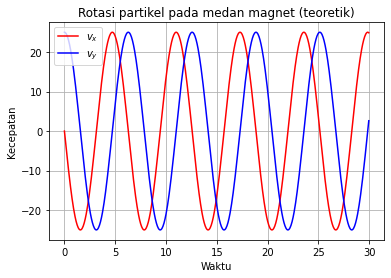

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameter
t = np.arange(0, 30, 0.05)

v_x = - 25 * np.sin(t) # asumsikan q, Bz, dan m adalah 1
v_y = 25 * np.cos(t)

plt.figure()
plt.grid()
plt.plot(t, v_x, 'r', label = '$v_x$')
plt.plot(t, v_y, 'b', label = '$v_y$')
plt.title('Rotasi partikel pada medan magnet (teoretik)')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(loc = 'upper left')
plt.savefig('Teoritik aja')
plt.show()

## d. Peroleh solusi numeriknya

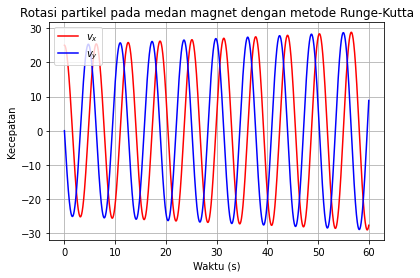

In [2]:
import matplotlib.pyplot as plt
# runge-kutta orde 4
def rk4(F, t, x, y, h):
    K0 = h * F(t, x, y)
    K1 = h * F(t + h/2.0, x + K0/2.0, y)
    K2 = h * F(t + h/2.0, x + K1/2.0, y)
    K3 = h * F(t + h, x + K2, y)
    return(K0 + 2.0 * K1 + 2.0 * K2 + K3)/6.0

# persamaan diferensial terkopel
def vx_kop(t, vx, vy, q = 1, Bz = 1, m = 1):
    return -q * Bz/m * vy

def vy_kop(t, vy, vx, q = 1, Bz = 1, m = 1):
    return q * Bz/m * vx

# parameter
vx0 = 0
vy0 = 25

t0 = 0
t_stop = 60

h = 0.005

vxs=[vx0]
vys=[vy0]
ts=[t0]

# Grafik solusi dengan metode runge-kutta orde 4
while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1] + rk4(vx_kop,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + rk4(vy_kop,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

plt.figure()
plt.grid()
plt.plot(ts, vys, 'r', label = '$v_x$')
plt.plot(ts, vxs, 'b', label = '$v_y$')
plt.title('Rotasi partikel pada medan magnet dengan metode Runge-Kutta')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend(loc = 'upper left')
plt.show()

## e. Bandingkan hasil kedua pendekatan teori dan numerik!

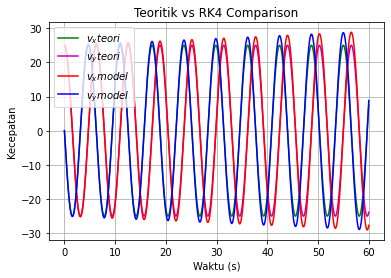

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Comparison graph
t = np.arange(0, 60, 0.005)

v_x = - 25 * np.sin(t)
v_y = 25 * np.cos(t)

plt.figure()
plt.grid()
plt.plot(t, v_x, 'g', label = '$v_x teori$')
plt.plot(t, v_y, 'm', label = '$v_y teori$')
plt.plot(ts, vys, 'r', label = '$v_x model$')
plt.plot(ts, vxs, 'b', label = '$v_y model$')
plt.title('Teoritik vs RK4 Comparison')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend(loc = 'upper left')
plt.show()

Berdasarkan hasil simulasi yang didapatkan dari pendekatan teori dan numerik dengan metode Runge-Kutta orde 4, diperoleh bahwa terdapat perbedaan amplitude dalam modeling dan juga teori. Namun dapat dilihat bahwa seharusnya runge-kutta orde 4 dengan teori menghasilkan grafik yang mirip dengan periode yang cenderung sama.